---
title: Advent of Code 2020
description: a verbose solve of AOC 2020
tags:
- python
date: 2020-12-01
lastmod: 2020-12-01
toc: true
---

The following is a write up of how to solve and the stuff I learved while doing so, thus some of the code is spelled out and slow! So look at the [AOC reddit site](https://www.reddit.com/r/adventofcode/) for ninja level solutions.

I am trying to

- code in a readable fashion, avoiding shortcuts (easier said then done!)
- make visuals as many problems as possible.
- not [mangle up jupyter notebooks too badly](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit?usp=sharing). Real code is written using a text editor! Unless you are [Netflix](https://netflixtechblog.com/notebook-innovation-591ee3221233), or course, or using [rmarkdown](https://yihui.org/en/2018/09/xfun-pkg-attach/).

First up, I'm importing all the libs I'll use up here:

In [1]:
# python essentials
import os
import re
import hashlib
import math
from pathlib import Path
from typing import List
from collections import defaultdict, namedtuple, Counter
import itertools

# useful external libs
#import numpy as np
#import pandas as pd

# misc utils
#import requests
#from tqdm.notebook import trange, tqdm # progress bars for slow funcs
#from functools import reduce 

# for plots, cause visuals
import matplotlib.pyplot as plt # goto python viz lib
#import seaborn as sns # prettify matplotlib
from IPython.display import display, Markdown

# javascript plotting for interactive graphs
#import altair as alt
#import plotly.express as px

Some helper functions to avoid rewriting the same code for all the problems:

In [2]:
input_path = Path("data") / "advent-of-code-2020"
github_url = url = "https://github.com/khalido/adventofcode/raw/master/inputs"

def get_input(day:int=1, splitlines=True):
    """takes in the day, year and date, returns the input"""
    
    try:    # load from local disk
        with open(input_path / f"{day}.txt") as f:
            data = f.read().strip()
    except: # else load from github repo
        print(f"Failed to load {year}/{day}.txt from disk")

    if splitlines: data = data.splitlines()

    return data 

def printmd(txt="## testing"):
    display(Markdown(txt))

Some generic plotting tools:

In [21]:
def plot_grid(grid, positions):
    """plots a text grid and highlights positions passed in"""
    binary_grid = [[c=="#" for c in row] for row in [row for row in grid]]
    fig = plt.figure(figsize=(6,6))
    plt.imshow(binary_grid, alpha=0.3)
    plt.axis('off')
    
    # plot position marker
    yy, xx = zip(*positions)
    plt.scatter(xx, yy, marker="x", s=500, alpha=0.8)
    
    # anootate positions
    for x, y in zip(xx,yy):
        plt.annotate(f"({x},{y})", (x-0.25,y))
    
    plt.show()

## Day 1: Report Repair

[#](https://adventofcode.com/2020/day/1) We have a list of numbers and need to find the two numbers that add up to 2020, and multiple them to get the answer.

In [3]:
test1 = """1721
979
366
299
675
1456""".splitlines()

inp1 = get_input(1)

def parse_1(inp): 
    return [int(i) for i in inp]

def solve_1(inp, numbers=2):
    # get the first nums which add up to 2020
    nums = [i for i in itertools.combinations(parse_1(inp), numbers) if sum(i)==2020][0]
    ans = math.prod(nums)
    return ans

assert solve_1(test1) == 514579
printmd(f"Day 1A: **{solve_1(inp1)}**")

Day 1A: **878724**

Now, whats a AOC challange if you don't eyeball it:

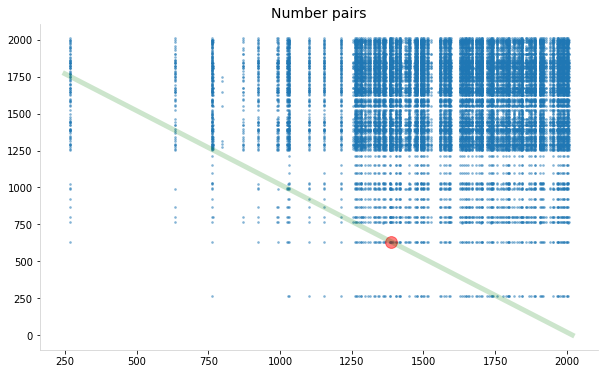

In [4]:
# the points to scatter
nums = [i for i in itertools.combinations(parse_1(inp1), 2)]
x, y = zip(*nums)

# the winning point
X, Y = [i for i in nums if sum(i)==2020][0]

# the bingo line
lx = list(range(250,2020))
ly = list(range(2020-250, 0,-1))

fig = plt.figure(figsize=(10,6))
plt.title("Number pairs")
plt.scatter(x, y, alpha=0.4, s=3)
plt.scatter(X, Y, color="red", s=140, alpha=0.5)
plt.plot(lx, ly, lw=5, alpha=0.2, color="green");

That is a lot of points, might be handy to stop it once it finds the right one. So switch from a list comprehension to a for loop which stops once the numbers summing to 2020 are found.

**Part 2:** Now we want to find the three numbers which sum to 2020 and return the multiple.

Since I made a general func to solve for 1, this is just rerunning the above with numbers set to 3.

In [5]:
assert solve_1(test1, 3) == 241861950
printmd(f"Day 1B: **{solve_1(inp1, 3)}**")

Day 1B: **201251610**

## Day 2: Password policy

[#](https://adventofcode.com/2020/day/2). We have a list of passwords in the form: `password policy: password`, where the first two numbers give a range of acceptable repeats for a character. Each policy has `"lo", "hi", "letter", "password"` which can be saved directly as a namedtuple.

In [22]:
test2 = """1-3 a: abcde
1-3 b: cdefg
2-9 c: ccccccccc""".splitlines()

inp2 = get_input(2)

Policy = namedtuple("Policy", ["lo", "hi", "letter", "password"])

def parse_2(inp):
    data = []

    for pol in [pol.split() for pol in inp]:
        lo, hi = map(int, pol[0].split("-"))
        letter = pol[1].strip(":")
        password = pol[2]
        data.append(Policy(lo, hi, letter, password))
    
    return data

parse_2(test2) # eyeballing to see it works:

[Policy(lo=1, hi=3, letter='a', password='abcde'),
 Policy(lo=1, hi=3, letter='b', password='cdefg'),
 Policy(lo=2, hi=9, letter='c', password='ccccccccc')]

To solve this is straightforward, we just make sure the count of the given char is within the acceptable range, which python makes easy by being able to easily check a number is within a range: `lo <= num <= hi`.

In [33]:
def solve_2(inp=test2):
    total = 0
    for pol in parse_2(inp):
        if pol.lo <= pol.password.count(pol.letter) <= pol.hi:
            total += 1

    return total

assert solve_2() == 2
printmd(f"Day 2A: **{solve_2(inp2)}**")


Day 2A: **424**

Sadly, its not so easy to eyeball this, though a realworld solution bould be a cli script listing all the pw with the [rich lib](https://github.com/willmcgugan/rich) to highlight bad passwords and where they fail the policy.

**Part 2:** Now the two nums in the beginning are positions, starting from 1. (no zero index). Only one of those positions can have the given letter.

This is simple than part 1, just needs some uderstanding of logical operators:

In [34]:
def solve_2b(inp=test2):
    total = 0
    for pol in parse_2(inp):
        char1 = pol.password[pol.lo-1]
        char2 = pol.password[pol.hi-1]
        if (pol.letter == char1) != (pol.letter == char2):
            total += 1
    return total

assert solve_2b() == 1
printmd(f"Day 2B: **{solve_2b(inp2)}**")

Day 2B: **747**

## Day 3: Toboggan Trajectory

[#](https://adventofcode.com/2020/day/3). We have a grid with open squares `.` and trees `#`, which repeat infinitely on the right.

We start at the top left and have to reach the bottom. We can move right 3, down 1 only. Following this trajectory, who many trees do we encounter?

In [7]:
test3 = """..##.......
#...#...#..
.#....#..#.
..#.#...#.#
.#...##..#.
..#.##.....
.#.#.#....#
.#........#
#.##...#...
#...##....#
.#..#...#.#""".splitlines()

inp3 = get_input(3)

In [12]:
def solve_3(grid=test3, slope=(3,1), start_pos=(0,0)):
    """returns a number of trees encountered on a given slope/grid/start_pos"""
    x,y = start_pos
    X,Y = slope
    
    # get positions our tobaggan travels through
    positions = []
    for i in range(len(grid)-1):
        x += X
        y += Y
        if y <= len(grid):
            positions.append((x,y))
            
    # count trees
    trees = 0
    l = len(grid[0])
    for x, y in positions:
        if grid[y][x%l] == "#":
            trees += 1
            
    return trees

assert solve_3(test3) == 7
printmd(f"Day 3A: {solve_3(inp3)}")

Day 3A: 272

**Part 2:** We have a number of different slopes to check the trees encountered.

In [17]:
slopes = [(1, 1), (3,1), (5,1), (7,1), (1,2)]

def solve_3b(inp=test3):
    num_trees = []

    for slope in slopes:
        trees = get_trees(inp, slope=slope)
        num_trees.append(trees)
    
    return math.prod(num_trees)

assert solve_3b() == 336
printmd(f"Day 3B: {solve_3b(inp3)}")

Day 3B: 3898725600